/Users/Aansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Out-of-bag score estimate: 0.894
Mean accuracy score: 0.892


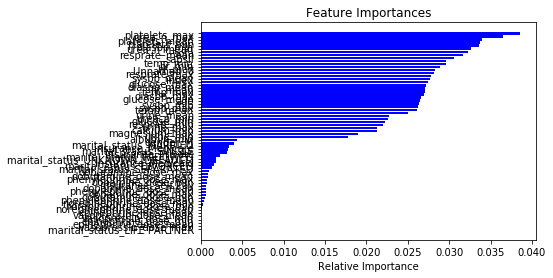

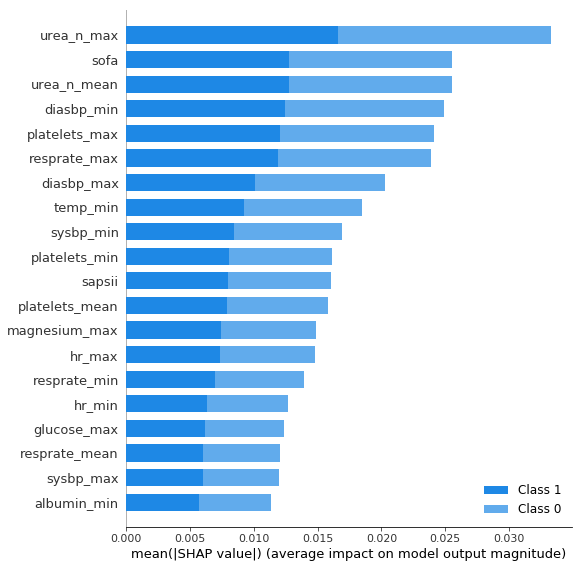

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
import shap


comments = pd.read_csv('x_more_no_df_clean.csv')
annotations = pd.read_csv('y_more_no_df_clean.csv')
comments = comments.reset_index()
x_train, x_test, y_train, y_test = train_test_split(comments, annotations, test_size=.8,random_state = 0)
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=0)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

features = list(comments.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('random_forest_importance.png')
plt.close()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation
shap.summary_plot(shap_values, x_train[:20], plot_type="dot")

In [10]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf, random_state=0).fit(x_train,y_train)
eli5.show_weights(perm, feature_names = comments.columns.tolist())

Weight,Feature
0.0281 ± 0.0020,urea_n_max
0.0243 ± 0.0028,urea_n_mean
0.0216 ± 0.0017,diasbp_min
0.0211 ± 0.0017,resprate_max
0.0211 ± 0.0009,platelets_max
0.0160 ± 0.0013,diasbp_max
0.0144 ± 0.0017,temp_min
0.0122 ± 0.0021,sofa
0.0115 ± 0.0008,sysbp_min
0.0102 ± 0.0016,hr_max
